# Fear & Greed Index For Stocks & Cryptos


## Topics

* Fear & Greed Index For Stocks
* Crypto Fear & Greed Index

## Fear & Greed Index For Stocks

Fear & Greed index is a tool for gauging investor sentiment in the stock market. There is one for the crypto market.

* 0 to 49 index score represents fear in the market
* 50 is neutral
* 51 to 100 score represents greed

For more information on the Fear & Greed Index: https://corporatefinanceinstitute.com/resources/knowledge/trading-investing/fear-and-greed-index/

In [17]:
# !pip install fear_greed_index

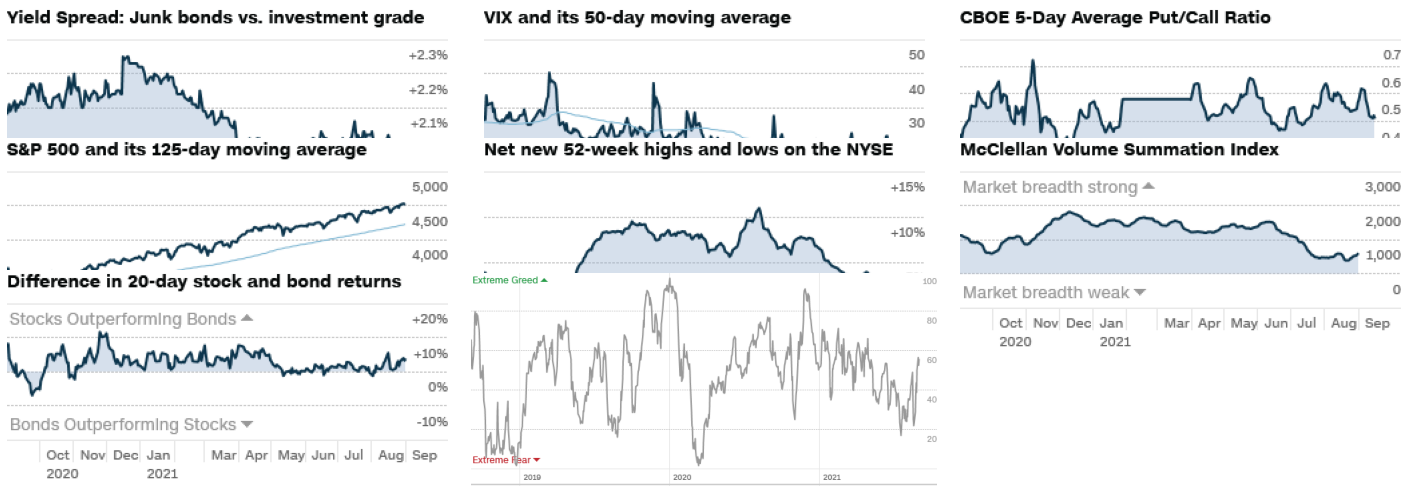

Fear & Greed Now: 56 (Greed)
   Previous Close: 53 (Neutral)
   1 Week Ago: 44 (Fear)
   1 Month Ago: 24 (Extreme Fear)
   1 Year Ago: 76 (Extreme Greed)

Junk Bond Demand: Extreme Greed                                                                     [Updated Sep 1 at 10:36am]
   Stocks have outperformed bonds by 3.86 percentage points during the last 20 trading days. This is close to the strongest performance for stocks relative to bonds in the past two years and indicates investors are rotating into stocks from the relative safety of bonds.
   (Last changed Aug 31 from a Greed rating)

Market Volatility: Extreme Greed                                                                    [Updated Sep 1 at 10:35am]
   During the last five trading days, volume in put options has lagged volume in call options by 59.02% as investors make bullish bets in their portfolios. This is among the lowest levels of put buying seen during the last two years, indicating extreme greed on the part of 

In [18]:
# Reference: https://github.com/DidierRLopes/fear-greed-index

from fear_greed_index.CNNFearAndGreedIndex import CNNFearAndGreedIndex
import matplotlib.pyplot as plt

cnn_fg = CNNFearAndGreedIndex()

# plot Fear and Greed charts
fig = plt.figure(figsize=(20, 7))
cnn_fg.plot_all_charts(fig)
plt.show()

# print Fear and Greed complete report|
print(cnn_fg.get_complete_report())

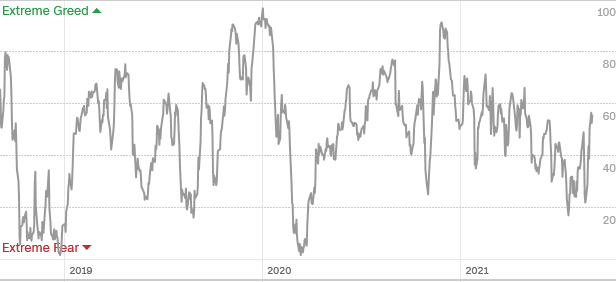

In [19]:
# Getting Fear & Greed Index Chart

cnn_fg.get_index_chart()

In [20]:
# Getting Index Summary

print(cnn_fg.get_index())

Fear & Greed Now: 56 (Greed)
   Previous Close: 53 (Neutral)
   1 Week Ago: 44 (Fear)
   1 Month Ago: 24 (Extreme Fear)
   1 Year Ago: 76 (Extreme Greed)


## Crypto Fear & Greed Index

Website: https://alternative.me/crypto/fear-and-greed-index/

In [21]:
import requests
import pandas as pd

url = "https://api.alternative.me/fng/?limit=0"

# Making a get request
response = requests.get(url)
 
# Print request object
#print(response.json())

You can use the regular default link `https://api.alternative.me/fng/?limit=10` from https://alternative.me/crypto/fear-and-greed-index/ to obtain crypto fear and greed index values. With the `limit=10` you get 10 dates with 10 values.

To obtain the full data from the crypto fear and greed index, do make sure to set `limit = 0`.

I have not shown the output from `response.json()` as it would be long. 

In [22]:
# Convert crypto fear and greed data into a dataframe:

fg_crypto_df = pd.DataFrame(response.json()['data'])

fg_crypto_df.head(12)

,value,value_classification,timestamp,time_until_update
0,71,Greed,1630454400,33258
1,73,Greed,1630368000,NaN
2,73,Greed,1630281600,NaN
3,72,Greed,1630195200,NaN
4,78,Extreme Greed,1630108800,NaN
5,71,Greed,1630022400,NaN
6,75,Greed,1629936000,NaN
7,73,Greed,1629849600,NaN
8,79,Extreme Greed,1629763200,NaN
9,79,Extreme Greed,1629676800,NaN


In [23]:
# Change timestamp values into dates:

fg_crypto_df['timestamp'] = pd.to_datetime(fg_crypto_df['timestamp'], unit = 's')

fg_crypto_df.head(12)

,value,value_classification,timestamp,time_until_update
0,71,Greed,2021-09-01,33258
1,73,Greed,2021-08-31,NaN
2,73,Greed,2021-08-30,NaN
3,72,Greed,2021-08-29,NaN
4,78,Extreme Greed,2021-08-28,NaN
5,71,Greed,2021-08-27,NaN
6,75,Greed,2021-08-26,NaN
7,73,Greed,2021-08-25,NaN
8,79,Extreme Greed,2021-08-24,NaN
9,79,Extreme Greed,2021-08-23,NaN


In [24]:
# Check data types.

fg_crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   value                 1306 non-null   object        
 1   value_classification  1306 non-null   object        
 2   timestamp             1306 non-null   datetime64[ns]
 3   time_until_update     1 non-null      object        
dtypes: datetime64[ns](1), object(3)
memory usage: 40.9+ KB


The timestamps are now in the datetime format. The value column needs to have numeric values. 

I change the column names and convert the value column into a column of numeric values.

In [25]:
# Change column names:

fg_crypto_df.columns = ['Value', 'Label', 'Date', 'Time Until Update']

In [26]:
# Change value into a numeric column:

fg_crypto_df['Value'] = pd.to_numeric(fg_crypto_df['Value'])

In [27]:
# Line Chart in Plotly:

import plotly.express as px
import plotly.graph_objects as go

fig = px.line(fg_crypto_df, x="Date", y="Value", title='Life expectancy in Canada')


# Update layout, title, labels and so on.
fig.update_layout(title={'text': 'Crypto Fear & Greed Index From alternative.me',
                         'y': 0.9, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},
                   xaxis_title='\nDate',
                   yaxis_title='Fear & Greed Value \n')



fig.show()

The nice part about this crypto fear and greed index graph is that it contains the full data for the index values. 

